In [1]:
import oommfc as mc
import discretisedfield as df
import micromagneticmodel as mm

region = df.Region(p1=(-50e-9, -50e-9, 0), p2=(50e-9, 50e-9, 10e-9))
subregions = {'r1': df.Region(p1=(-50e-9, -50e-9, 0), p2=(0, 50e-9, 10e-9)),
              'r2': df.Region(p1=(0, -50e-9, 0), p2=(50e-9, 50e-9, 10e-9))}
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9))#, subregions=subregions)

system = mm.System(name='steps')

system.energy = mm.Exchange(A=1e-12) + mm.Demag() + mm.UniaxialAnisotropy(K=1e3, u=(0, 0, 1)) + \
   mm.DMI(D=1e-4, crystalclass='Cnv') + mm.Zeeman(H=(0, 0, 1e5)) + mm.CubicAnisotropy(K=1e2, u1=(0, 0, 1), u2=(0, 1, 0))
system.dynamics = mm.Precession(gamma0=mm.consts.gamma0) + mm.Damping(alpha=0.1)

Ms = 1.1e6

# create system with above geometry and initial magnetisation
system.m = df.Field(mesh, dim=3, value=(1, 0, 0), norm=Ms)

Running OOMMF (ExeOOMMFRunner) [2020/12/31 19:14]... (1.8 s)


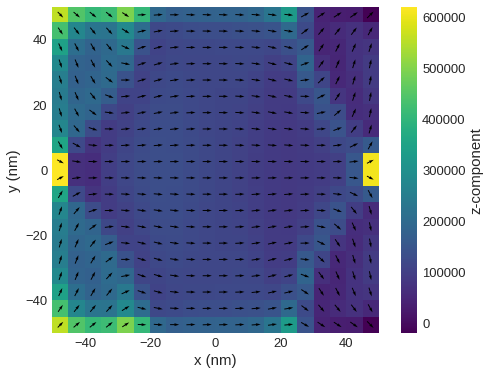

In [2]:
# minimize the energy
# td = mc.TimeDriver()
# td.drive(system, t=2e-9, n=10, dirname='./my_simulations')

md = mc.MinDriver()
md.drive(system, output_step=True)

# Plot relaxed configuration: vectors in z-plane
system.m.plane('z').mpl()

In [3]:
len(system.table.data.index)

225

In [4]:
system.m.orientation((20e-9, 0, 0))

(0.9962954996360199, -0.02882055891648705, 0.08102254494123623)

In [5]:
system.table.mpl(yaxis=['E_zeeman'])

ValueError: Cannot plot table data with no time column.

In [ ]:
system.table.mpl(yaxis=['mz'])

In [ ]:
system.table

In [ ]:
import micromagneticmodel as mm

In [ ]:
mm.__version__